In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv('dataset/24-hours Delhi Power Consumption dataset.csv')

In [7]:
df

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation
...,...,...,...,...,...,...,...,...,...,...
8732,8732,2023-12-30 20:00:00,5,20,1,16.464144,0,7.909442,23111,Peak Load Shifting
8733,8733,2023-12-30 21:00:00,5,21,1,5.597822,0,3.319968,22308,Peak Load Shifting
8734,8734,2023-12-30 22:00:00,5,22,1,7.153052,0,9.686246,21935,Peak Load Shifting
8735,8735,2023-12-30 23:00:00,5,23,1,11.815588,0,0.498725,20497,Normal Operation


In [8]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [9]:
def assign_compensation_method(row):
    if row['is_holiday'] == 1:
        return 'Lower Power Supply'
    elif row['solar_generation'] > 200:
        return 'Increased Renewable Energy Integration'
    elif row['hour_of_day'] >= 18 and row['hour_of_day'] <= 22:
        return 'Peak Load Shifting'
    elif row['temperature'] > 35:
        return 'Increased Power Supply'
    else:
        return 'Normal Operation'

df['compensation_method'] = df.apply(assign_compensation_method, axis=1)

print(df[['timestamp', 'load', 'compensation_method']].head(10))


            timestamp   load                     compensation_method
0 2023-01-01 00:00:00  18493                        Normal Operation
1 2023-01-01 01:00:00  17090                        Normal Operation
2 2023-01-01 02:00:00  16052                        Normal Operation
3 2023-01-01 03:00:00  15356                        Normal Operation
4 2023-01-01 04:00:00  14936                        Normal Operation
5 2023-01-01 05:00:00  14884                        Normal Operation
6 2023-01-01 06:00:00  15314  Increased Renewable Energy Integration
7 2023-01-01 07:00:00  16591  Increased Renewable Energy Integration
8 2023-01-01 08:00:00  18271                        Normal Operation
9 2023-01-01 09:00:00  19470  Increased Renewable Energy Integration


In [10]:
df.head()

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
X = df[['temperature', 'solar_generation', 'hour_of_day', 'load', 'is_holiday']]
y=df['compensation_method']
X_reg = df[['temperature', 'solar_generation', 'hour_of_day', 'is_holiday']]
y_reg = df['load']
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [14]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

In [15]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_clf=RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
rf_reg.fit(X_reg_train, y_reg_train)

RandomForestRegressor(random_state=42)

In [17]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_clf.predict(X_test)
class_accuracy = accuracy_score(y_test, y_pred)
print(f"Classification Model Accuracy: {class_accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Make predictions on the test set for regression (peak supply)
y_reg_pred = rf_reg.predict(X_reg_test)
reg_mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Regression Model Mean Squared Error: {reg_mse:.2f}")
print(confusion_matrix(y_test, y_pred))

Classification Model Accuracy: 1.00
                                        precision    recall  f1-score   support

                Increased Power Supply       1.00      1.00      1.00       183
Increased Renewable Energy Integration       1.00      1.00      1.00       559
                    Lower Power Supply       1.00      0.91      0.95        22
                      Normal Operation       1.00      1.00      1.00      1373
                    Peak Load Shifting       1.00      1.00      1.00       485

                              accuracy                           1.00      2622
                             macro avg       1.00      0.98      0.99      2622
                          weighted avg       1.00      1.00      1.00      2622

Regression Model Mean Squared Error: 5842110.28
[[ 183    0    0    0    0]
 [   0  559    0    0    0]
 [   0    0   20    1    1]
 [   0    0    0 1373    0]
 [   0    0    0    0  485]]


In [19]:
def predict_for_date(date, temperature, solar_generation, hour_of_day, is_holiday, rf_clf, rf_reg, le):
    new_data_class = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'load': [0],
        'is_holiday': [is_holiday]
    })

    new_data_reg = pd.DataFrame({
        'temperature': [temperature],
        'solar_generation': [solar_generation],
        'hour_of_day': [hour_of_day],
        'is_holiday': [is_holiday]
    })
    
    predicted_class_label = rf_clf.predict(new_data_class)
    predicted_compensation_method = le.inverse_transform(predicted_class_label)
    predicted_peak_supply = rf_reg.predict(new_data_reg)

    return {
        'date': date,
        'hour_of_day': hour_of_day,
        'compensation_method': predicted_compensation_method[0],
        'peak_supply_needed': predicted_peak_supply[0]
    }

def generate_24_hour_predictions(timestamp, temperature, solar_generation, is_holiday, rf_clf, rf_reg, le):

    results = []

    hour=timestamp.hour
    
    prediction = predict_for_date(timestamp, temperature, solar_generation, hour, is_holiday, rf_clf, rf_reg, le)
    results.append(prediction)
    
    df_predictions = pd.DataFrame(results)
    
    return df_predictions


In [20]:
testdf=pd.read_csv('dataset/24-hours testset - Copy.csv')

In [21]:
testdf.drop('electricity_demand', axis=1, inplace=True)

In [22]:
testdf['timestamp']=pd.to_datetime(testdf['timestamp'])

In [23]:
def generate_year_predictions(test_dataset, rf_clf, rf_reg, le):
    
    all_predictions = []

    for _, row in test_dataset.iterrows():
        timestamp = pd.to_datetime(row['timestamp'])
        temperature = row['temperature']
        solar_generation = row['solar_generation']
        is_holiday = row['is_holiday']

        # Generate predictions for each hour of the day
        daily_predictions = generate_24_hour_predictions(timestamp, temperature, solar_generation, is_holiday, rf_clf, rf_reg, le)
        all_predictions.append(daily_predictions)
    
    # Combine all daily predictions into one DataFrame
    df_all_predictions = pd.concat(all_predictions, ignore_index=True)
    
    return df_all_predictions


In [24]:
df_year_predictions = generate_year_predictions(testdf, rf_clf, rf_reg, le)

df_year_predictions

,date,hour_of_day,compensation_method,peak_supply_needed
0,2024-01-01 00:00:00,0,Normal Operation,15386.95
1,2024-01-01 01:00:00,1,Normal Operation,18800.11
2,2024-01-01 02:00:00,2,Normal Operation,15802.49
3,2024-01-01 03:00:00,3,Normal Operation,15823.29
4,2024-01-01 04:00:00,4,Normal Operation,15207.12
...,...,...,...,...
8756,2024-12-30 20:00:00,20,Peak Load Shifting,23352.72
8757,2024-12-30 21:00:00,21,Peak Load Shifting,22631.59
8758,2024-12-30 22:00:00,22,Peak Load Shifting,19311.79
8759,2024-12-30 23:00:00,23,Normal Operation,18716.42


In [25]:
original=pd.read_csv('dataset/24-hours testset - Copy.csv')

C:\Users\ariel\AppData\Local\Temp\ipykernel_5608\3804829911.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df.head(100), x='hour_of_day', y='load', palette='Set1')


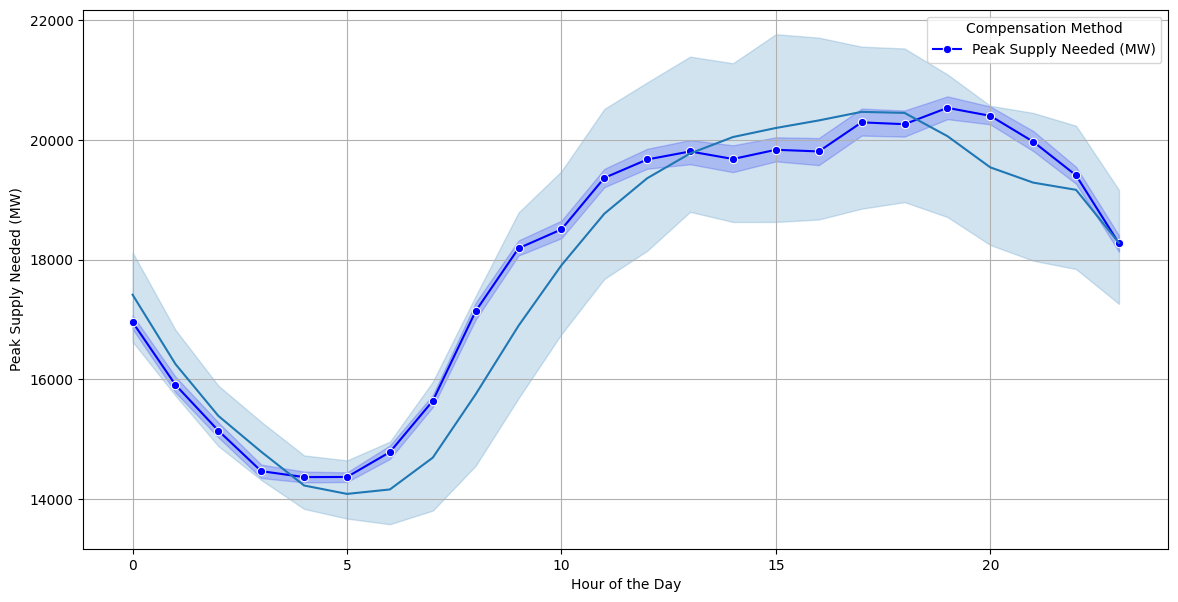

In [26]:
def plot_predictions(df_predictions):
    plt.figure(figsize=(14, 7))

    sns.lineplot(data=df_year_predictions, x='hour_of_day', y='peak_supply_needed', marker='o', color='blue', label='Peak Supply Needed (MW)')
    
    sns.lineplot(data=df.head(100), x='hour_of_day', y='load', palette='Set1')

    # plt.title('Hourly Predictions for {}'.format(df_predictions['date'][0]))
    plt.xlabel('Hour of the Day')
    plt.ylabel('Peak Supply Needed (MW)')
    plt.legend(title='Compensation Method')
    plt.grid(True)
    plt.show()

plot_predictions(df_year_predictions)

In [27]:
testdf['old_compensation']=df_year_predictions['compensation_method']

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
predicted_loads = df_year_predictions['peak_supply_needed'].head(8737)
actual_loads = df['load']

In [30]:
mae = mean_absolute_error(actual_loads, predicted_loads)
mse = mean_squared_error(actual_loads, predicted_loads)
rmse = np.sqrt(mse)
r2 = r2_score(actual_loads, predicted_loads)
mape = np.mean(np.abs((actual_loads - predicted_loads) / actual_loads)) * 100
accuracy = 100 - mape

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")
print(f"Accuracy: {accuracy:.4f}%")

Mean Absolute Error (MAE): 1763.8064
Mean Squared Error (MSE): 5600933.2232
Root Mean Squared Error (RMSE): 2366.6291
R-squared (R²): 0.5113
Mean Absolute Percentage Error (MAPE): 9.5810%
Accuracy: 90.4190%
